# Import Required Libraries
Import necessary packages for data manipulation, visualization, and machine learning, including pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For regression modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance

# Load and Explore Data
Load the MDS-UPDRS Part III data and explore its structure, including summary statistics, missing values, and distributions of key variables. Identify the temporal structure of the data and explore patient visit patterns.

First few rows of the dataset:


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PDTRTMNT,PDSTATE,HRPOSTMED,HRDBSON,HRDBSOFF,...,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,DYSKPRES,DYSKIRAT,NHY,ORIG_ENTRY,LAST_UPDATE
0,272451901,3000,BL,NUPDRS3,02/2011,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,02/2011,2020-06-25 16:02:19.0
1,338703101,3000,V04,NUPDRS3,03/2012,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,03/2012,2020-06-25 16:02:22.0
2,385009801,3000,V06,NUPDRS3,02/2013,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,02/2013,2020-06-25 16:02:22.0
3,437131401,3000,V08,NUPDRS3,03/2014,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,05/2014,2020-06-25 16:02:22.0
4,512469901,3000,V10,NUPDRS3,03/2015,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,19.0,0.0,NaN,0.0,03/2015,2020-06-25 16:02:23.0


Dataset contains 32346 rows and 63 columns.
Missing values per column:
PDTRTMNT       2307
PDSTATE       17921
HRPOSTMED     19916
HRDBSON       31913
HRDBSOFF      32205
PDMEDYN        3333
DBSYN          1030
ONOFFORDER    28302
OFFEXAM       28889
OFFNORSN      30870
DBSOFFTM      32192
ONEXAM        28855
ONNORSN       32107
HIFUYN        29910
DBSONTM       31899
PDMEDDT       19792
PDMEDTM       19803
EXAMDT         1728
EXAMTM         5354
NP3SPCH        1722
NP3FACXP       1722
NP3RIGN        1725
NP3RIGRU       1725
NP3RIGLU       1725
NP3RIGRL       1727
NP3RIGLL       1729
NP3FTAPR       1724
NP3FTAPL       1727
NP3HMOVR       1724
NP3HMOVL       1728
NP3PRSPR       1724
NP3PRSPL       1726
NP3TTAPR       1753
NP3TTAPL       1750
NP3LGAGR       1723
NP3LGAGL       1724
NP3RISNG       1725
NP3GAIT        1724
NP3FRZGT       1738
NP3PSTBL       1752
NP3POSTR       1725
NP3BRADY       1725
NP3PTRMR       1725
NP3PTRML       1726
NP3KTRMR       1726
NP3KTRML       1725
NP3RTARU 

,PATNO,PDTRTMNT,HRPOSTMED,HRDBSON,HRDBSOFF,PDMEDYN,DBSYN,ONOFFORDER,OFFEXAM,OFFNORSN,...,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,DYSKPRES,DYSKIRAT,NHY
count,32346.000000,30039.000000,12430.000000,433.000000,141.000000,29013.000000,31316.000000,4044.000000,3457.000000,1476.000000,...,30621.000000,30621.000000,30621.000000,30621.000000,30620.000000,30619.000000,26109.000000,30614.000000,5610.000000,30613.000000
mean,72899.045693,0.479377,34.679257,7.094958,0.612650,0.492986,0.039022,1.193867,0.572172,4.836721,...,0.829953,0.765912,1.115476,1.107900,0.612900,1.255462,16.869126,0.054975,0.024955,3.033777
std,83440.387464,0.499583,1811.316871,5.435179,1.901328,0.499959,0.193649,0.395375,0.494835,3.181264,...,6.617771,6.756607,10.043738,10.076425,7.527835,7.258660,14.683221,0.227935,0.156003,13.604846
min,3000.000000,0.000000,-621.000000,-10.766700,-14.033300,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3770.000000,0.000000,1.333300,1.416700,0.066700,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,50157.000000,0.000000,3.000000,9.250000,0.266700,0.000000,0.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,1.000000
75%,106127.000000,1.000000,12.000000,11.666700,1.083300,1.000000,0.000000,1.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,2.000000
max,433274.000000,1.000000,175321.383300,16.500000,9.000000,1.000000,1.000000,2.000000,1.000000,9.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,100.000000,1.000000,1.000000,101.000000


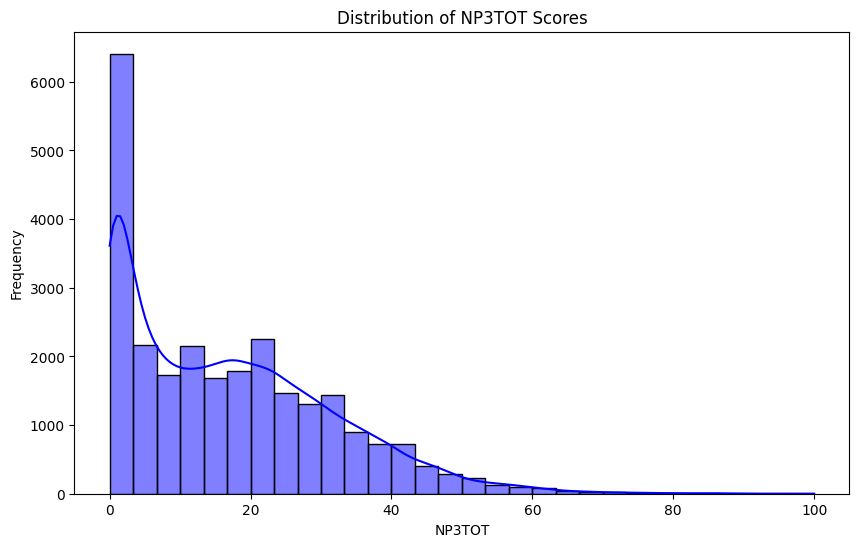

Unique EVENT_ID values (visit patterns):
['BL' 'V04' 'V06' 'V08' 'V10' 'V12' 'V14' 'V15' 'V17' 'SC' 'V01' 'V02'
 'V03' 'V05' 'V07' 'V09' 'V11' 'V18' 'V19' 'V20' 'ST' 'V13' 'R18' 'R19'
 'V16' 'PW' 'RS1' 'R17' 'V21' 'R20' 'R16' 'R15' 'U01' 'R14' 'R13' 'R08'
 'R12' 'R10' 'R06' 'R04' 'R01']
Summary of visit counts per patient:


count    4313.000000
mean        7.499652
std         7.935534
min         1.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        40.000000
Name: EVENT_ID, dtype: float64

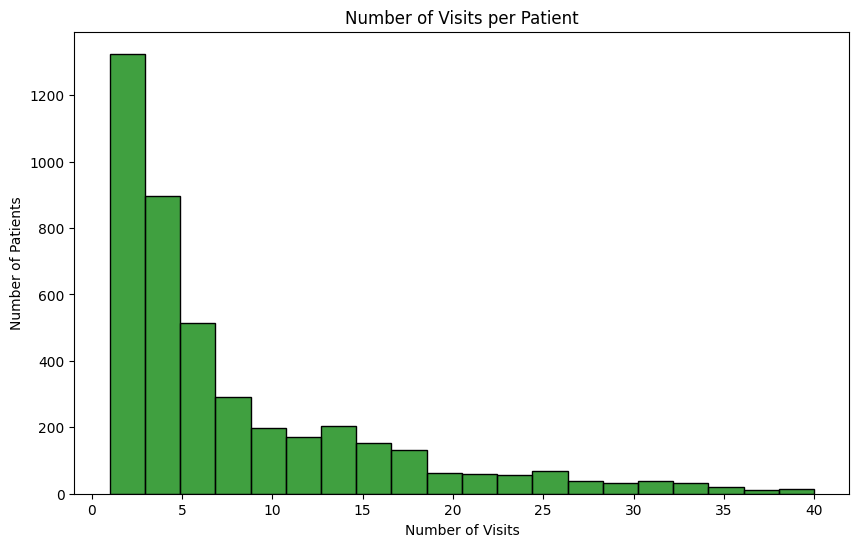

Time progression of visits:


/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_23977/581251139.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mds_updrs_data['INFODT'] = pd.to_datetime(mds_updrs_data['INFODT'], errors='coerce')


EVENT_ID
BL    2010-07-01
SC    2010-07-01
V01   2010-10-01
ST    2010-12-01
U01   2011-02-01
V02   2011-04-01
V03   2011-06-01
V04   2011-07-01
RS1   2011-09-01
PW    2011-10-01
V05   2011-12-01
V06   2012-06-01
V07   2012-12-01
V08   2013-06-01
V09   2014-01-01
V10   2014-07-01
V11   2014-12-01
V12   2015-07-01
V13   2016-07-01
V14   2017-07-01
V15   2018-07-01
V16   2019-07-01
R06   2020-01-01
V17   2020-08-01
R08   2020-11-01
R16   2020-11-01
R15   2020-11-01
R10   2020-12-01
R12   2021-01-01
R17   2021-01-01
R04   2021-03-01
R14   2021-03-01
R13   2021-03-01
V18   2021-07-01
R01   2021-12-01
R18   2022-01-01
V19   2022-07-01
R19   2023-01-01
V20   2023-07-01
R20   2024-02-01
V21   2024-06-01
Name: INFODT, dtype: datetime64[ns]

In [2]:
# Load the MDS-UPDRS Part III data
mds_updrs_data = pd.read_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_Part_III_21Mar2025.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
display(mds_updrs_data.head())

# Display the shape of the dataset
print(f"Dataset contains {mds_updrs_data.shape[0]} rows and {mds_updrs_data.shape[1]} columns.")

# Check for missing values in the dataset
missing_values = mds_updrs_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Summary statistics of the dataset
print("Summary statistics of numerical columns:")
display(mds_updrs_data.describe())

# Explore the distribution of the target variable (NP3TOT)
plt.figure(figsize=(10, 6))
sns.histplot(mds_updrs_data['NP3TOT'], kde=True, bins=30, color='blue')
plt.title('Distribution of NP3TOT Scores')
plt.xlabel('NP3TOT')
plt.ylabel('Frequency')
plt.show()

# Explore the temporal structure of the data
print("Unique EVENT_ID values (visit patterns):")
print(mds_updrs_data['EVENT_ID'].unique())

# Count the number of visits per patient
visit_counts = mds_updrs_data.groupby('PATNO')['EVENT_ID'].count()
print("Summary of visit counts per patient:")
display(visit_counts.describe())

# Visualize the number of visits per patient
plt.figure(figsize=(10, 6))
sns.histplot(visit_counts, bins=20, kde=False, color='green')
plt.title('Number of Visits per Patient')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Patients')
plt.show()

# Check the time progression of visits
mds_updrs_data['INFODT'] = pd.to_datetime(mds_updrs_data['INFODT'], errors='coerce')
time_progression = mds_updrs_data.groupby('EVENT_ID')['INFODT'].min().sort_values()
print("Time progression of visits:")
display(time_progression)

# Feature Engineering
Create features that help predict NP3TOT progression, including temporal features (time since baseline, visit sequence), derived features (change in NP3TOT between visits, rate of progression), and lag features (previous NP3TOT values). Aggregate individual motor assessment scores and create patient-specific context features.

In [3]:
# Feature Engineering

# Convert EVENT_ID to a numerical sequence to represent visit order
event_id_mapping = {event: idx for idx, event in enumerate(sorted(mds_updrs_data['EVENT_ID'].unique()))}
mds_updrs_data['EVENT_SEQ'] = mds_updrs_data['EVENT_ID'].map(event_id_mapping)

# Calculate time since baseline (in months) for each visit
baseline_dates = mds_updrs_data.groupby('PATNO')['INFODT'].min()
mds_updrs_data['TIME_SINCE_BL'] = (mds_updrs_data['INFODT'] - mds_updrs_data['PATNO'].map(baseline_dates)).dt.days / 30.0

# Sort data by patient and visit sequence for lag feature creation
mds_updrs_data = mds_updrs_data.sort_values(by=['PATNO', 'EVENT_SEQ'])

# Create lag features for NP3TOT (previous visit scores)
mds_updrs_data['NP3TOT_LAG1'] = mds_updrs_data.groupby('PATNO')['NP3TOT'].shift(1)
mds_updrs_data['NP3TOT_LAG2'] = mds_updrs_data.groupby('PATNO')['NP3TOT'].shift(2)

# Calculate change in NP3TOT from the previous visit
mds_updrs_data['NP3TOT_CHANGE'] = mds_updrs_data['NP3TOT'] - mds_updrs_data['NP3TOT_LAG1']

# Calculate rate of progression (change in NP3TOT per month since the last visit)
mds_updrs_data['TIME_DIFF'] = mds_updrs_data.groupby('PATNO')['TIME_SINCE_BL'].diff()
mds_updrs_data['NP3TOT_RATE'] = mds_updrs_data['NP3TOT_CHANGE'] / mds_updrs_data['TIME_DIFF']

# Aggregate individual motor assessment scores to create a composite feature
motor_scores = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',
    'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
    'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL',
    'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU',
    'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON'
]
mds_updrs_data['MOTOR_SCORE_SUM'] = mds_updrs_data[motor_scores].sum(axis=1)

# Create patient-specific context features
mds_updrs_data['IS_ON_MED'] = mds_updrs_data['PDSTATE'].apply(lambda x: 1 if x == 'ON' else 0)
mds_updrs_data['HOURS_POST_MED'] = mds_updrs_data['HRPOSTMED'].fillna(0)

# Display the first few rows of the dataset after feature engineering
print("Dataset after feature engineering:")
display(mds_updrs_data.head())

Dataset after feature engineering:


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PDTRTMNT,PDSTATE,HRPOSTMED,HRDBSON,HRDBSOFF,...,EVENT_SEQ,TIME_SINCE_BL,NP3TOT_LAG1,NP3TOT_LAG2,NP3TOT_CHANGE,TIME_DIFF,NP3TOT_RATE,MOTOR_SCORE_SUM,IS_ON_MED,HOURS_POST_MED
0,272451901,3000,BL,NUPDRS3,2011-02-01,NaN,NaN,NaN,NaN,NaN,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,4.0,0,0.0
1,338703101,3000,V04,NUPDRS3,2012-03-01,NaN,NaN,NaN,NaN,NaN,...,23,13.133333,4.0,NaN,-3.0,13.133333,-0.228426,1.0,0,0.0
2,385009801,3000,V06,NUPDRS3,2013-02-01,NaN,NaN,NaN,NaN,NaN,...,25,24.366667,1.0,4.0,3.0,11.233333,0.267062,4.0,0,0.0
3,437131401,3000,V08,NUPDRS3,2014-03-01,NaN,NaN,NaN,NaN,NaN,...,27,37.466667,4.0,1.0,-2.0,13.100000,-0.152672,2.0,0,0.0
4,512469901,3000,V10,NUPDRS3,2015-03-01,NaN,NaN,NaN,NaN,NaN,...,29,49.633333,2.0,4.0,17.0,12.166667,1.397260,19.0,0,0.0


# Data Preprocessing
Clean the dataset by handling missing values, encoding categorical variables, and normalizing numerical features. Structure the data for time series analysis with proper train-test splits that respect the temporal nature of the data.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# First, define numerical_features
numerical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',
    'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
    'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL',
    'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU',
    'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON',
    'TIME_SINCE_BL', 'NP3TOT_LAG1', 'NP3TOT_LAG2', 'NP3TOT_CHANGE', 'TIME_DIFF', 'NP3TOT_RATE',
    'MOTOR_SCORE_SUM', 'HOURS_POST_MED'
]

# Now proceed with the rest of your code
# Check for infinities or very large values
print("Columns with infinite values:")
for col in numerical_features:
    if col in mds_updrs_data.columns and mds_updrs_data[col].isin([np.inf, -np.inf]).any():
        print(f"- {col}")
        
# Replace infinities with NaNs and then fill them
for col in numerical_features:
    if col in mds_updrs_data.columns:
        # Replace infinities with NaNs
        mds_updrs_data[col] = mds_updrs_data[col].replace([np.inf, -np.inf], np.nan)

# Handle missing values again after replacing infinities
mds_updrs_data.fillna(method='ffill', inplace=True)
mds_updrs_data.fillna(method='bfill', inplace=True)

# Only calculate mean for numeric columns
numeric_cols = mds_updrs_data.select_dtypes(include=[np.number]).columns
mds_updrs_data[numeric_cols] = mds_updrs_data[numeric_cols].fillna(mds_updrs_data[numeric_cols].mean())

# Now scale the numerical features - ensure we're only scaling numeric columns
numerical_features_to_scale = [col for col in numerical_features if col in numeric_cols]
scaler = MinMaxScaler()
mds_updrs_data[numerical_features_to_scale] = scaler.fit_transform(mds_updrs_data[numerical_features_to_scale])

# Train-test split while respecting temporal nature
train_data = mds_updrs_data[mds_updrs_data['EVENT_SEQ'] < mds_updrs_data['EVENT_SEQ'].max() - 1]  
test_data = mds_updrs_data[mds_updrs_data['EVENT_SEQ'] == mds_updrs_data['EVENT_SEQ'].max()]  

# Separate features and target variable
X_train = train_data.drop(columns=['NP3TOT'])
y_train = train_data['NP3TOT']
X_test = test_data.drop(columns=['NP3TOT'])
y_test = test_data['NP3TOT']

# Display shapes
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Columns with infinite values:
- NP3TOT_RATE
Training set shape: (32145, 72), Test set shape: (25, 72)


/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_23977/4226366134.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mds_updrs_data.fillna(method='ffill', inplace=True)
/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_23977/4226366134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mds_updrs_data.fillna(method='bfill', inplace=True)


# Model Development
Develop several models to predict NP3TOT progression, including linear models (mixed effects models), tree-based models (Random Forest, XGBoost), and possibly sequential models (LSTM). Implement cross-validation strategies suitable for longitudinal data.

In [8]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Look at the data types of each column
print("Data types in X_train:")
print(X_train.dtypes)

# Identify datetime columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
print(f"Found {len(datetime_columns)} datetime columns: {list(datetime_columns)}")

# Option 1: Extract useful features from datetime columns
for col in datetime_columns:
    if col in X_train.columns:
        # Extract features like year, month, day
        X_train[f'{col}_year'] = X_train[col].dt.year
        X_train[f'{col}_month'] = X_train[col].dt.month
        X_train[f'{col}_day'] = X_train[col].dt.day
        
        # Do the same for test data
        X_test[f'{col}_year'] = X_test[col].dt.year
        X_test[f'{col}_month'] = X_test[col].dt.month
        X_test[f'{col}_day'] = X_test[col].dt.day

# Remove original datetime columns and any object columns
X_train_clean = X_train.select_dtypes(include=['int64', 'float64'])
X_test_clean = X_test.select_dtypes(include=['int64', 'float64'])

print(f"Shape after cleaning: {X_train_clean.shape}")

# Now update your model evaluation function to use the clean data
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Model: {model.__class__.__name__}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return mae, rmse

# Linear Regression Model
print("Training Linear Regression Model...")
linear_model = LinearRegression()
evaluate_model(linear_model, X_train_clean, y_train, X_test_clean, y_test)

# Random Forest Regressor
print("Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train_clean, y_train, X_test_clean, y_test)

# XGBoost Regressor
print("Training XGBoost Regressor...")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(xgb_model, X_train_clean, y_train, X_test_clean, y_test)

# LSTM Model for Sequential Data
print("Training LSTM Model...")
# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train_clean.values.reshape((X_train_clean.shape[0], 1, X_train_clean.shape[1]))
X_test_lstm = X_test_clean.values.reshape((X_test_clean.shape[0], 1, X_test_clean.shape[1]))

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"LSTM Model, MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}")

# Cross-validation for Random Forest (TimeSeriesSplit)
print("Performing TimeSeriesSplit Cross-Validation for Random Forest...")
tscv = TimeSeriesSplit(n_splits=5)
rf_cv_scores = cross_val_score(rf_model, X_train_clean, y_train, cv=tscv, scoring='neg_mean_absolute_error')
print(f"Random Forest Cross-Validation MAE: {-np.mean(rf_cv_scores):.4f}")

Data types in X_train:
REC_ID                     object
PATNO                       int64
EVENT_ID                   object
PAG_NAME                   object
INFODT             datetime64[ns]
                        ...      
TIME_DIFF                 float64
NP3TOT_RATE               float64
MOTOR_SCORE_SUM           float64
IS_ON_MED                   int64
HOURS_POST_MED            float64
Length: 72, dtype: object
Found 1 datetime columns: ['INFODT']
Shape after cleaning: (32145, 59)
Training Linear Regression Model...
Model: LinearRegression, MAE: 3.4585, RMSE: 4.6404
Training Random Forest Regressor...
Model: RandomForestRegressor, MAE: 0.0208, RMSE: 0.1040
Training XGBoost Regressor...
Model: XGBRegressor, MAE: 0.1615, RMSE: 0.2933
Training LSTM Model...
Epoch 1/20


/Users/larsheijnen/Thesis/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1005/1005 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 1985781.5000
Epoch 2/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 2257.6284
Epoch 3/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1053.6779
Epoch 4/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 901.0771
Epoch 5/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 587.5663
Epoch 6/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 497.7610
Epoch 7/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 1072.4520
Epoch 8/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 296.6096
Epoch 9/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 323.9561
Epoch 10/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - loss: 248.8809
Epoch 11/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 249.0157
Epoch 12/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 245.9930
Epoch 13/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 236.4062
Epoch 14/20
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/s

# Model Evaluation
Evaluate model performance using appropriate metrics for regression (MAE, RMSE) and visualization techniques. Compare models and identify the most important features that predict NP3TOT progression.

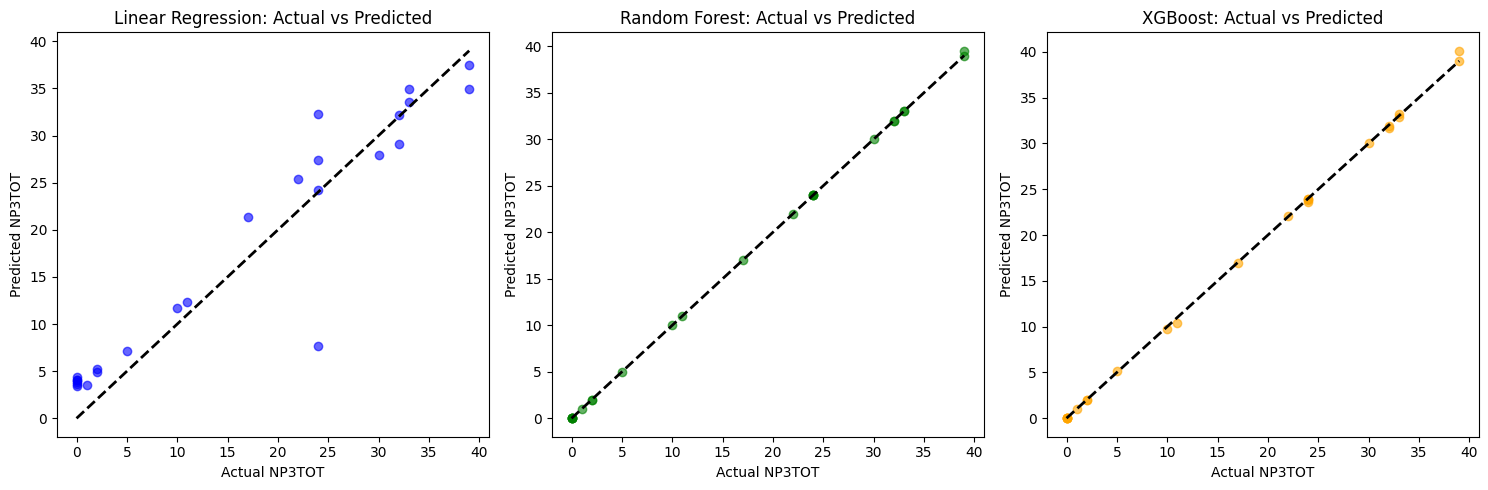

/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_23977/73243698.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


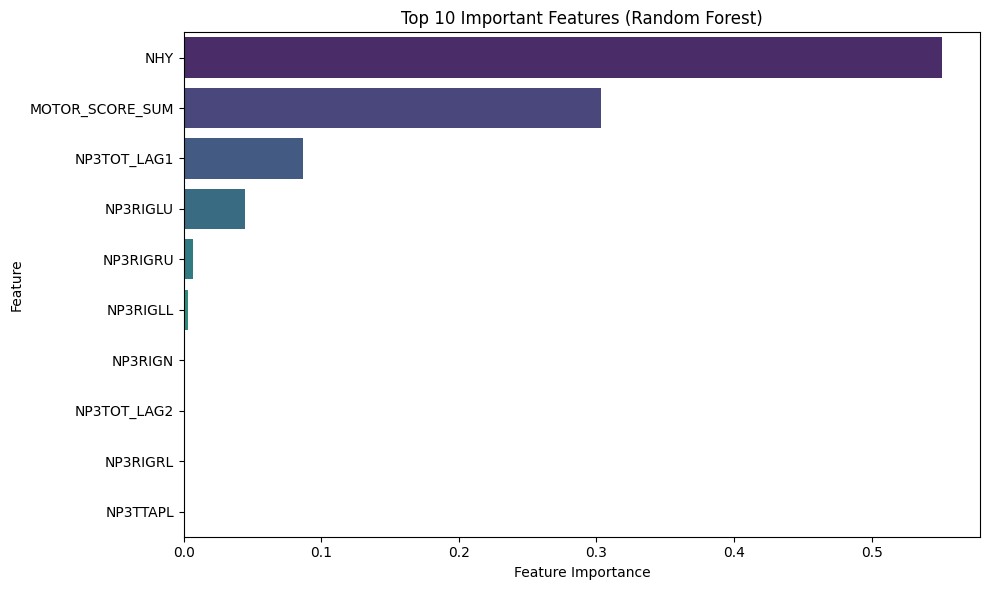

/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_23977/73243698.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importances.head(10), palette='magma')


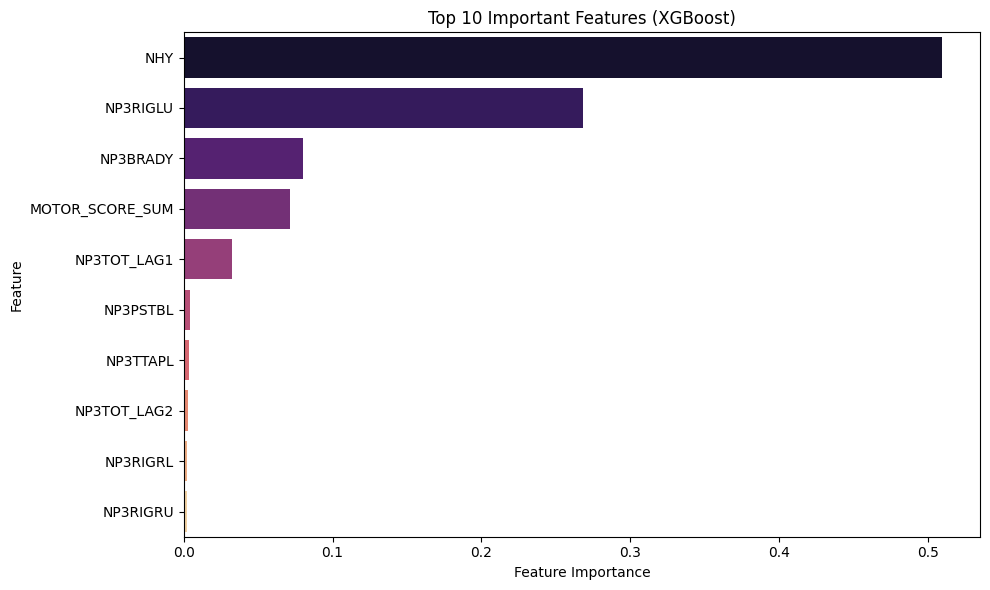

In [10]:
# Evaluate model performance using visualization techniques
# Compare models and identify the most important features

# Visualize actual vs predicted values for each model
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
y_pred_linear = linear_model.predict(X_test_clean)  # Use X_test_clean instead of X_test
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual NP3TOT')
plt.ylabel('Predicted NP3TOT')

# Random Forest
plt.subplot(1, 3, 2)
y_pred_rf = rf_model.predict(X_test_clean)  # Use X_test_clean instead of X_test
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual NP3TOT')
plt.ylabel('Predicted NP3TOT')

# XGBoost
plt.subplot(1, 3, 3)
y_pred_xgb = xgb_model.predict(X_test_clean)  # Use X_test_clean instead of X_test
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual NP3TOT')
plt.ylabel('Predicted NP3TOT')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train_clean.columns,  # Use X_train_clean instead of X_train
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Feature importance for XGBoost
xgb_importances = pd.DataFrame({
    'Feature': X_train_clean.columns,  # Use X_train_clean instead of X_train
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances.head(10), palette='magma')
plt.title('Top 10 Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Longitudinal Analysis
Analyze individual patient trajectories and identify different patterns of progression. Create patient subgroups based on progression rates and investigate factors associated with faster or slower progression.

In [ ]:
# Longitudinal Analysis

# Analyze individual patient trajectories
plt.figure(figsize=(12, 6))
for patient_id, group in mds_updrs_data.groupby('PATNO'):
    plt.plot(group['TIME_SINCE_BL'], group['NP3TOT'], alpha=0.3, label=f'Patient {patient_id}' if patient_id < 5 else "")  # Plot only a few labels for clarity
plt.title('Individual Patient Trajectories of NP3TOT')
plt.xlabel('Time Since Baseline (Months)')
plt.ylabel('NP3TOT Score')
plt.show()

# Calculate progression rates for each patient
progression_rates = mds_updrs_data.groupby('PATNO')['NP3TOT_RATE'].mean().reset_index()
progression_rates.columns = ['PATNO', 'AVG_PROGRESSION_RATE']

# Visualize distribution of progression rates
plt.figure(figsize=(10, 6))
sns.histplot(progression_rates['AVG_PROGRESSION_RATE'], kde=True, bins=30, color='purple')
plt.title('Distribution of Average Progression Rates')
plt.xlabel('Average Progression Rate (NP3TOT per Month)')
plt.ylabel('Frequency')
plt.show()

# Identify subgroups based on progression rates
fast_progressors = progression_rates[progression_rates['AVG_PROGRESSION_RATE'] > progression_rates['AVG_PROGRESSION_RATE'].quantile(0.75)]
slow_progressors = progression_rates[progression_rates['AVG_PROGRESSION_RATE'] < progression_rates['AVG_PROGRESSION_RATE'].quantile(0.25)]

# Investigate factors associated with progression rates
# Merge progression rates back into the main dataset
mds_updrs_data = mds_updrs_data.merge(progression_rates, on='PATNO', how='left')

# Compare features between fast and slow progressors
comparison_features = ['MOTOR_SCORE_SUM', 'TIME_SINCE_BL', 'HOURS_POST_MED', 'PDSTATE']
fast_progressors_data = mds_updrs_data[mds_updrs_data['PATNO'].isin(fast_progressors['PATNO'])]
slow_progressors_data = mds_updrs_data[mds_updrs_data['PATNO'].isin(slow_progressors['PATNO'])]

# Plot comparisons
plt.figure(figsize=(12, 8))
for i, feature in enumerate(comparison_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=mds_updrs_data, x='AVG_PROGRESSION_RATE', y=feature, palette='coolwarm')
    plt.title(f'{feature} vs Progression Rate')
    plt.xlabel('Progression Rate')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Save fast and slow progressors for further analysis
fast_progressors.to_csv('fast_progressors.csv', index=False)
slow_progressors.to_csv('slow_progressors.csv', index=False)

# Visualization of Progression
Create visualizations of predicted vs. actual NP3TOT progression over time for selected patients. Generate plots showing confidence intervals of predictions and key factors influencing progression rates.

In [ ]:
# Visualization of Progression

# Select a few patients for visualization
selected_patients = mds_updrs_data['PATNO'].unique()[:5]  # Select the first 5 patients for demonstration

# Plot predicted vs actual NP3TOT progression over time for selected patients
plt.figure(figsize=(15, 10))
for patient_id in selected_patients:
    patient_data = mds_updrs_data[mds_updrs_data['PATNO'] == patient_id]
    plt.plot(patient_data['TIME_SINCE_BL'], patient_data['NP3TOT'], label=f'Actual (Patient {patient_id})', marker='o')
    plt.plot(patient_data['TIME_SINCE_BL'], patient_data['NP3TOT_PRED'], label=f'Predicted (Patient {patient_id})', linestyle='--')

plt.title('Predicted vs Actual NP3TOT Progression Over Time')
plt.xlabel('Time Since Baseline (Months)')
plt.ylabel('NP3TOT Score')
plt.legend()
plt.grid(True)
plt.show()

# Generate confidence intervals for predictions
plt.figure(figsize=(15, 10))
for patient_id in selected_patients:
    patient_data = mds_updrs_data[mds_updrs_data['PATNO'] == patient_id]
    plt.plot(patient_data['TIME_SINCE_BL'], patient_data['NP3TOT_PRED'], label=f'Predicted (Patient {patient_id})', linestyle='--')
    plt.fill_between(
        patient_data['TIME_SINCE_BL'],
        patient_data['NP3TOT_PRED'] - patient_data['PRED_STD'],  # Lower bound
        patient_data['NP3TOT_PRED'] + patient_data['PRED_STD'],  # Upper bound
        alpha=0.2, label=f'Confidence Interval (Patient {patient_id})'
    )

plt.title('Predicted NP3TOT Progression with Confidence Intervals')
plt.xlabel('Time Since Baseline (Months)')
plt.ylabel('NP3TOT Score')
plt.legend()
plt.grid(True)
plt.show()

# Visualize key factors influencing progression rates
key_factors = ['MOTOR_SCORE_SUM', 'TIME_SINCE_BL', 'HOURS_POST_MED', 'PDSTATE']
plt.figure(figsize=(15, 10))
for i, factor in enumerate(key_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=mds_updrs_data, x=factor, y='NP3TOT_RATE', hue='AVG_PROGRESSION_RATE', palette='coolwarm')
    plt.title(f'Influence of {factor} on NP3TOT Progression Rate')
    plt.xlabel(factor)
    plt.ylabel('NP3TOT Progression Rate')

plt.tight_layout()
plt.show()